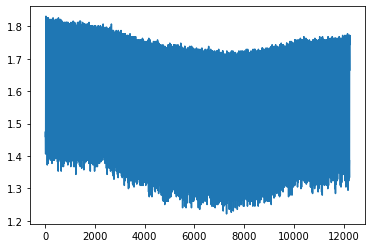

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
#%matplotlib notebook

sig1=[]
sig2=[]
t = []
i=0

with open('C:/Users/Utente/T-junction/T-junction/T-data/18-11/B-ol20-aq20-pause10.csv') as data:
    for sig in csv.reader(data, delimiter='	'):
        #print(sig)
        sig[0] = sig[0].replace('.','').replace(',','.')
        sig[1] = sig[1].replace('.','').replace(',','.')
        sig[2] = sig[2].replace('.','').replace(',','.')
        #print(sig)
        sig1.append(float(sig[0]))
        sig2.append(float(sig[1]))
        t.append(float(sig[2]))
sig1 = np.array(sig1)
sig1 = sig1[0:-1]
sig2 = np.array(sig2)
sig2 = sig2[0:-1]
t = np.array(t)
t = t[0:-1]        

plt.figure()
plt.plot(sig2)
#plt.ylim(1.1,1.9 )
#plt.xlim(0, 500)
plt.show()
        


[[Model]]
    Model(linear, prefix='lin_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 12253
    # variables        = 2
    chi-square         = 241.805583
    reduced chi-square = 0.01973762
    Akaike info crit   = -48093.8289
    Bayesian info crit = -48079.0018
[[Variables]]
    lin_slope:     -1.8928e-04 +/- 1.4543e-05 (7.68%) (init = 0)
    lin_intercept:  1.66685733 +/- 0.00250757 (0.15%) (init = 1.6)
[[Correlations]] (unreported correlations are < 0.100)
    C(lin_slope, lin_intercept) = -0.862


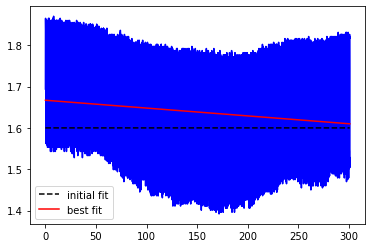

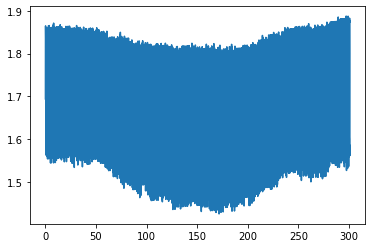

In [2]:
#"Rotate signal"
from lmfit.models import LinearModel
linear = LinearModel(prefix='lin_')
pars = linear.make_params(slope = 0, intercept=1.6)
init = linear.eval(pars, x=t)
out = linear.fit(sig1, pars, x=t)
print(out.fit_report())

plt.plot(t, sig1, color='blue')
plt.plot(t, out.init_fit, 'k--', label='initial fit')
plt.plot(t, out.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
#plt.xlim(30, 150)
plt.show()

slope=out.best_values.get('lin_slope')
sig1[:]=sig1[:]-slope*t[:]
plt.figure()
plt.plot(t,sig1)

[1.4291201  1.43838323 1.44764636 1.45690949 1.46617263 1.47543576
 1.48469889 1.49396202 1.50322516 1.51248829 1.52175142 1.53101455
 1.54027769 1.54954082 1.55880395 1.56806708 1.57733022 1.58659335
 1.59585648 1.60511961 1.61438275 1.62364588 1.63290901 1.64217214
 1.65143528 1.66069841 1.66996154 1.67922467 1.68848781 1.69775094
 1.70701407 1.7162772  1.72554034 1.73480347 1.7440666  1.75332973
 1.76259287 1.771856   1.78111913 1.79038226 1.7996454  1.80890853
 1.81817166 1.82743479 1.83669793 1.84596106 1.85522419 1.86448732
 1.87375046 1.88301359] 

[1.42448853 1.43375166 1.4430148  1.45227793 1.46154106 1.47080419
 1.48006733 1.48933046 1.49859359 1.50785672 1.51711986 1.52638299
 1.53564612 1.54490925 1.55417239 1.56343552 1.57269865 1.58196178
 1.59122492 1.60048805 1.60975118 1.61901431 1.62827745 1.63754058
 1.64680371 1.65606684 1.66532998 1.67459311 1.68385624 1.69311937
 1.70238251 1.71164564 1.72090877 1.7301719  1.73943504 1.74869817
 1.7579613  1.76722443 1.77648757 1.

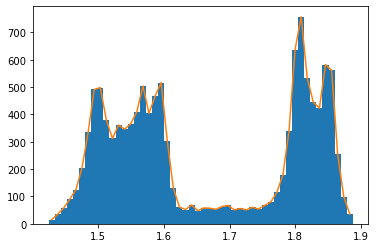

In [3]:
#histogram plot
nbins =50
plt.figure()
freq,bins,p = plt.hist(sig1, nbins)

x = 0.5 *(bins[:-1] + bins[1:])
print(x,'\n')
print(bins)

plt.plot(x,freq)

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 204
    # data points      = 50
    # variables        = 6
    chi-square         = 925657.750
    reduced chi-square = 21037.6761
    Akaike info crit   = 503.311842
    Bayesian info crit = 514.783980
##  Warning: uncertainties could not be estimated:
    g1_sigma:      at initial value
[[Variables]]
    g1_amplitude:  42.0294257 (init = 37.85)
    g1_center:     1.55580104 (init = 1.474509)
    g1_sigma:      0.03025957 (init = 0.03025957)
    g1_fwhm:       0.07125583 == '2.3548200*g1_sigma'
    g1_height:     554.116199 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  49.8342600 (init = 37.85)
    g2_center:     1.82228710 (init = 1.845353)
    g2_sigma:      0.03206301 (init = 0.03025957)
    g2_fwhm:       0.07550262 == '2.3548200*g2_sigma'
    g2_height:     620.060133 == '0.3989423*g2_ampli

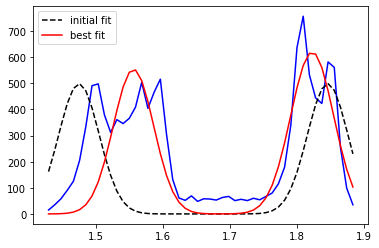

xmax 1:  1.595856482120375 
 xmax 2:  1.8089085292837344


In [4]:
#histogram fit

from lmfit.models import GaussianModel

for i in range(1,6):    #Cicle changing center1 position if condition (center1+2*sigma1 < center2-2*sigma2) is not fulfilled

    #linear = LinearModel(prefix='lin_')
    gauss1 = GaussianModel(prefix='g1_')
    pars = gauss1.make_params(center=x[0]+i*(x[-1]-x[0])/10, sigma=(x[-1]-x[0])/15 , amplitude=max(freq)/20)

    #gauss1 = GaussianModel(prefix='g1_')
    #pars.update(gauss1.make_params())

    gauss2 = GaussianModel(prefix='g2_')
    pars.update(gauss2.make_params())

    pars['g1_center'].set(max = x[0]+(x[-1]-x[0])*0.7, min=min(x))
    pars['g1_sigma'].set(max=(x[-1]-x[0])/10,min=(x[-1]-x[0])/30)
    #pars['g1_amplitude'].set(value=max(freq)/20,min=10)

    pars['g2_center'].set(value=x[-1]*0.98)
    pars['g2_sigma'].set(value=(x[-1]-x[0])/15)
    pars['g2_amplitude'].set(value=max(freq)/20,min=10)

    #mod = linear + gauss1 +gauss2
    mod = gauss1 +gauss2

    init = mod.eval(pars, x=x)
    out = mod.fit(freq, pars, x=x)
    print(out.fit_report())
    
    plt.figure()
    plt.plot(x, freq, color='blue')
    plt.plot(x, out.init_fit, 'k--', label='initial fit')
    plt.plot(x, out.best_fit, 'r-', label='best fit')
    plt.legend(loc='best')
    #plt.xlim(30, 150)
    plt.show()
    
    center2=out.best_values.get('g2_center')
    sigma2=out.best_values.get('g2_sigma')
    center1=out.best_values.get('g1_center')
    sigma1=out.best_values.get('g1_sigma')
    
    if center1+2*sigma1 < center2-2*sigma2:
        max_freq1=max(freq[x<center1+sigma1])
        x_max1 = x[np.argmax(freq[x<center1+2*sigma1])]
        max_freq2=max(freq[x>center2-sigma2])
        a=x>center2-sigma2
        freq2=np.zeros(len(freq))
        for i in range(len(a)): 
            if a[i]==True: freq2[i]=freq[i]
        #print(freq2)
        x_max2 = x[np.argmax(freq2)]
        print('xmax 1: ', x_max1,'\n xmax 2: ',x_max2)
        break
    else: print('trying again')
soglia_sig1_low = x_max1 +2*sigma1
soglia_sig1_high = x_max2 -2*sigma1

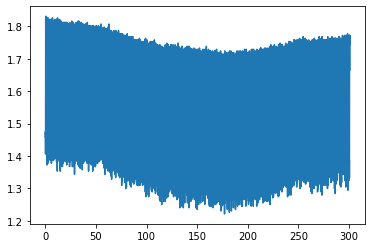

[[Model]]
    Model(linear, prefix='lin_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 12253
    # variables        = 2
    chi-square         = 380.718018
    reduced chi-square = 0.03107649
    Akaike info crit   = -42531.8863
    Bayesian info crit = -42517.0592
[[Variables]]
    lin_slope:     -2.1927e-04 +/- 1.8248e-05 (8.32%) (init = 0)
    lin_intercept:  1.56870342 +/- 0.00314646 (0.20%) (init = 1.6)
[[Correlations]] (unreported correlations are < 0.100)
    C(lin_slope, lin_intercept) = -0.862


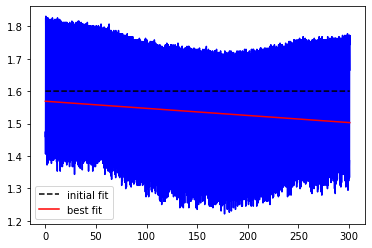

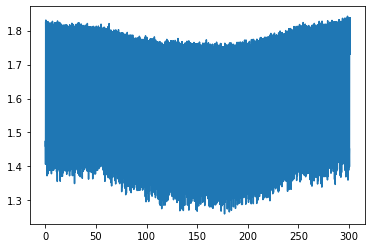

In [5]:
#same for sig2
plt.figure()
plt.plot(t,sig2)
#plt.ylim(1.3, 2.1)
#plt.xlim(0, 500)
plt.show()

#"Rotate signal"
from lmfit.models import LinearModel
linear = LinearModel(prefix='lin_')
pars = linear.make_params(slope = 0, intercept=1.6)
init = linear.eval(pars, x=t)
out = linear.fit(sig2, pars, x=t)
print(out.fit_report())

plt.figure()
plt.plot(t, sig2, color='blue')
plt.plot(t, out.init_fit, 'k--', label='initial fit')
plt.plot(t, out.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
#plt.xlim(30, 150)
plt.show()

slope=out.best_values.get('lin_slope')
sig2[:]=sig2[:]-slope*t[:]
plt.figure()
plt.plot(t,sig2)

In [6]:
sig2[-2:]

array([1.8189644, 1.7309701])

[1.26565017 1.27730325 1.28895632 1.3006094  1.31226247 1.32391555
 1.33556862 1.3472217  1.35887477 1.37052785 1.38218092 1.393834
 1.40548708 1.41714015 1.42879323 1.4404463  1.45209938 1.46375245
 1.47540553 1.4870586  1.49871168 1.51036475 1.52201783 1.5336709
 1.54532398 1.55697705 1.56863013 1.5802832  1.59193628 1.60358935
 1.61524243 1.6268955  1.63854858 1.65020165 1.66185473 1.6735078
 1.68516088 1.69681395 1.70846703 1.7201201  1.73177318 1.74342625
 1.75507933 1.7667324  1.77838548 1.79003855 1.80169163 1.8133447
 1.82499778 1.83665085] 

[1.25982364 1.27147671 1.28312979 1.29478286 1.30643594 1.31808901
 1.32974209 1.34139516 1.35304824 1.36470131 1.37635439 1.38800746
 1.39966054 1.41131361 1.42296669 1.43461976 1.44627284 1.45792591
 1.46957899 1.48123206 1.49288514 1.50453821 1.51619129 1.52784436
 1.53949744 1.55115051 1.56280359 1.57445666 1.58610974 1.59776281
 1.60941589 1.62106896 1.63272204 1.64437511 1.65602819 1.66768126
 1.67933434 1.69098741 1.70264049 1.71429

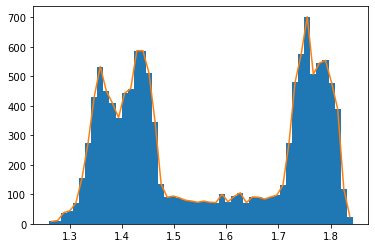

In [7]:
#histogram plot
nbins =50
plt.figure()
freq,bins,p = plt.hist(sig2[0:-2], nbins)


x = 0.5 *(bins[:-1] + bins[1:])
print(x,'\n')
print(bins)

plt.plot(x,freq)
print(freq)

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 71
    # data points      = 50
    # variables        = 6
    chi-square         = 538152.423
    reduced chi-square = 12230.7369
    Akaike info crit   = 476.193705
    Bayesian info crit = 487.665843
##  Warning: uncertainties could not be estimated:
    g1_sigma:      at initial value
[[Variables]]
    g1_amplitude:  59.0253998 (init = 35.1)
    g1_center:     1.40955286 (init = 1.32275)
    g1_sigma:      0.03806671 (init = 0.03806671)
    g1_fwhm:       0.08964025 == '2.3548200*g1_sigma'
    g1_height:     618.591088 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  61.0983664 (init = 35.1)
    g2_center:     1.76583728 (init = 1.799918)
    g2_sigma:      0.03822367 (init = 0.03806671)
    g2_fwhm:       0.09000986 == '2.3548200*g2_sigma'
    g2_height:     637.686670 == '0.3989423*g2_amplitude

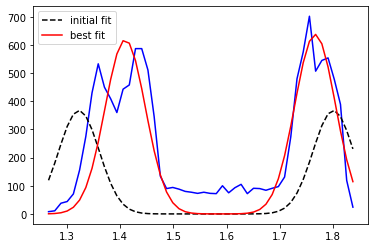

xmax 1:  1.4287932252150624 
 xmax 2:  1.7550793276482115


In [8]:
#histogram fit

from lmfit.models import GaussianModel

for i in range(1,6):    #Cicle changing center1 position if condition (center1+2*sigma1 < center2-2*sigma2) is not fulfilled

    #linear = LinearModel(prefix='lin_')
    gauss1 = GaussianModel(prefix='g1_')
    pars = gauss1.make_params(center=x[0]+i*(x[-1]-x[0])/10, sigma=(x[-1]-x[0])/15 , amplitude=max(freq)/20)

    #gauss1 = GaussianModel(prefix='g1_')
    #pars.update(gauss1.make_params())

    gauss2 = GaussianModel(prefix='g2_')
    pars.update(gauss2.make_params())

    pars['g1_center'].set(max = x[0]+(x[-1]-x[0])*0.7, min=min(x))
    pars['g1_sigma'].set(max=(x[-1]-x[0])/10,min=(x[-1]-x[0])/30)
    #pars['g1_amplitude'].set(value=max(freq)/20,min=10)

    pars['g2_center'].set(value=x[-1]*0.98)
    pars['g2_sigma'].set(value=(x[-1]-x[0])/15)
    pars['g2_amplitude'].set(value=max(freq)/20,min=10)

    #mod = linear + gauss1 +gauss2
    mod = gauss1 +gauss2

    init = mod.eval(pars, x=x)
    out = mod.fit(freq, pars, x=x)
    print(out.fit_report())

    plt.plot(x, freq, color='blue')
    plt.plot(x, out.init_fit, 'k--', label='initial fit')
    plt.plot(x, out.best_fit, 'r-', label='best fit')
    plt.legend(loc='best')
    #plt.xlim(30, 150)
    plt.show()
    
    center2=out.best_values.get('g2_center')
    sigma2=out.best_values.get('g2_sigma')
    center1=out.best_values.get('g1_center')
    sigma1=out.best_values.get('g1_sigma')
    
    if center1+2*sigma1 < center2-2*sigma2:
        max_freq1=max(freq[x<center1+sigma1])
        x_max1 = x[np.argmax(freq[x<center1+sigma1])]
        max_freq2=max(freq[x>center2-sigma2])
        a=x>center2-sigma2
        freq2=np.zeros(len(freq))
        for i in range(len(a)): 
            if a[i]==True: freq2[i]=freq[i]
        #print(freq2)
        x_max2 = x[np.argmax(freq2)]
        print('xmax 1: ', x_max1,'\n xmax 2: ',x_max2)
        break
    else: print('trying again')
    
soglia_sig2_low = x_max1 +2*sigma1
soglia_sig2_high = x_max2 -2*sigma2

1.6563756143580828
1.7483893970460265


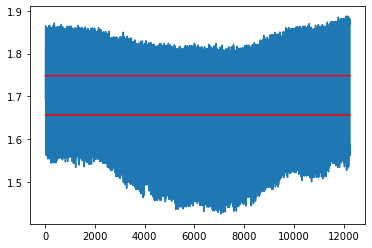

In [9]:
print(soglia_sig1_low)
print(soglia_sig1_high)

plt.plot(sig1)
plt.plot(soglia_sig1_high*np.ones(len(t)), color='red')
plt.plot(soglia_sig1_low*np.ones(len(t)), color='red')
#plt.xlim(0,2000)
#plt.ylim(1.5,1.95)
plt.show()

In [10]:
soglia_sig2_high*np.ones(len(x))

array([1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199,
       1.67863199, 1.67863199, 1.67863199, 1.67863199, 1.67863199])

1.5049266491161304
1.6786319939928096


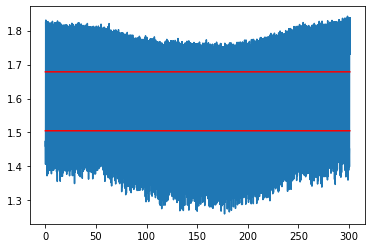

In [11]:
print(soglia_sig2_low)
print(soglia_sig2_high)

plt.plot(t,sig2)
plt.plot(t,soglia_sig2_high*np.ones(len(t)), color='red')
plt.plot(t,soglia_sig2_low*np.ones(len(t)), color='red')
#plt.xlim(330,380)
plt.show()

In [12]:
#definisco una goccia da quando il segnale sale sopra la soglia alta a quando scende sotto la soglia bassa
bool_high1=sig1>soglia_sig1_high
bool_low1=sig1<soglia_sig1_low
print(bool_high1, len(bool_high1))
print(bool_low1, len(bool_low1))


[False False  True ... False False False] 12253
[False False False ...  True  True  True] 12253


In [13]:
goccia_start1 =[0]
goccia_end1 = [1]
for i in range(len(sig1)-1):
    if bool_high1[i]==False and bool_low1[i+1]==False and bool_high1[i+1]==True:
        if goccia_start1[-1:]<goccia_end1[-1:]:
            goccia_start1.append(i)
    elif bool_low1[i]==False and bool_low1[i+1]==True and bool_high1[i+1]==False:
        if goccia_start1[-1:]>goccia_end1[-1:]:
            goccia_end1.append(i)
   

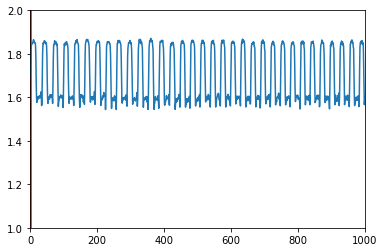

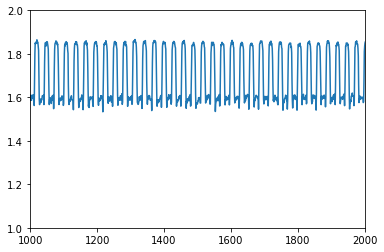

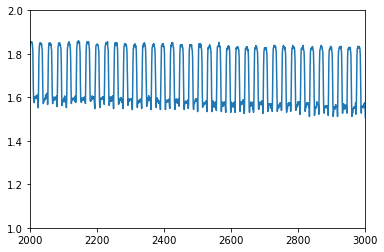

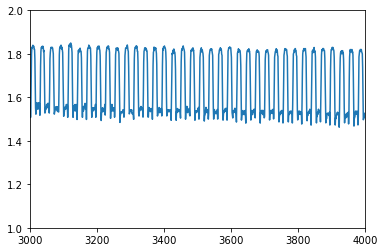

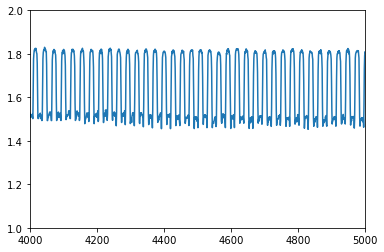

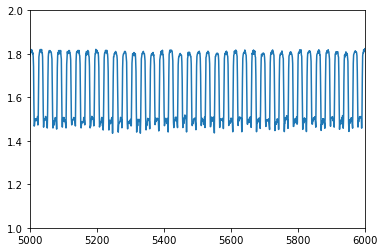

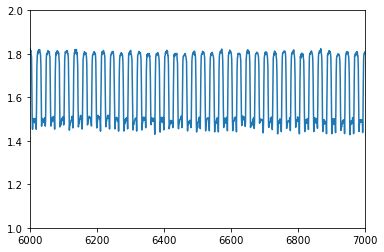

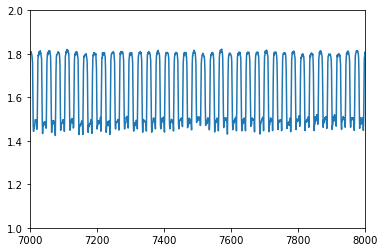

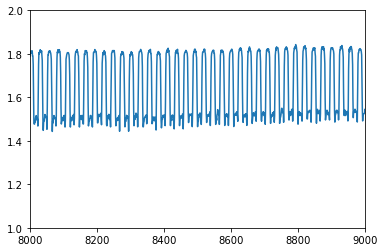

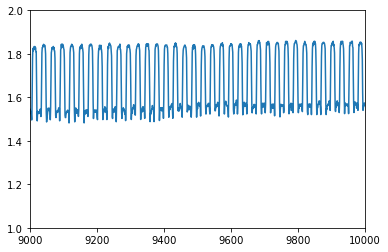

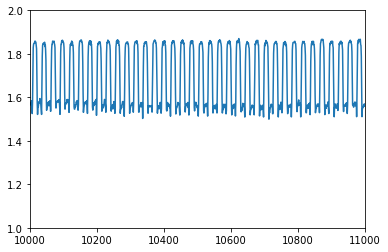

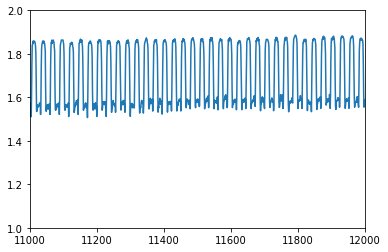

In [14]:
ymin=1
ymax=2

for j in range(12):
    plt.figure()
    for i in range(len(goccia_end1)):
        
        plt.vlines(goccia_start1[i], ymin, ymax, color='green')
        plt.vlines(goccia_end1[i], ymin, ymax, color='red')


    plt.plot(sig1)
    plt.xlim(j*1000,(j+1)*1000)
    plt.ylim(1,2)
    plt.show()

In [15]:
bool_high2=sig2>soglia_sig2_high
bool_low2=sig2<soglia_sig2_low
print(bool_high2, len(bool_high2))
print(bool_low2, len(bool_low2))


[False False False ...  True  True  True] 12253
[ True  True  True ... False False False] 12253


In [16]:
goccia_start2 =[0]
goccia_end2 = [1]
for i in range(len(sig2)-1):
    if bool_high2[i]==False and bool_low2[i+1]==False and bool_high2[i+1]==True:
        if goccia_start2[-1:]<goccia_end2[-1:]:
            goccia_start2.append(i)
    elif bool_low2[i]==False and bool_low2[i+1]==True and bool_high2[i+1]==False:
        if goccia_start2[-1:]>goccia_end2[-1:]:
            goccia_end2.append(i)
    

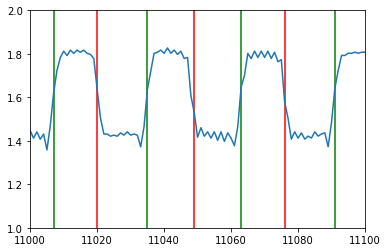

In [17]:
ymin=1.
ymax=2.1
plt.plot(sig2)
plt.plot(0,500)
plt.ylim(ymin,ymax)

for i in range(len(goccia_end2)):
    #print(goccia_start2[i],goccia_end2[i])
    plt.vlines(goccia_start2[i], ymin, ymax, color='green')
    plt.vlines(goccia_end2[i], ymin, ymax, color='red')

plt.xlim(11000,11100)
plt.ylim(1,2)
plt.show()

In [18]:
t[goccia_end1]

array([0.01])